<a href="https://colab.research.google.com/github/DeV-Parekh/ML_Tasks/blob/main/Naive_Baysian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SPAM_Email.csv")
df.head()

,Unnamed: 0,v1,v2
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [ ]:
df['spam']=df['v1'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,v1,v2,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.v2,df.spam)

In [ ]:
X_train

4614    Sunshine Quiz! Win a super Sony DVD recorder i...
4780    Yup... Hey then one day on fri we can ask miwa...
2238    Think you sent the text to the home phone. Tha...
4572    \URGENT! This is the 2nd attempt to contact U!...
1239    Hope you are having a great new semester. Do w...
                              ...                        
1450                            Msg me when rajini comes.
2247    Back 2 work 2morro half term over! Can U C me ...
4025                              Oh ok.. Wat's ur email?
5454         Im just wondering what your doing right now?
310     Today is ACCEPT DAY..U Accept me as? Brother S...
Name: v2, Length: 4179, dtype: object

# New Section

# New Section

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [ ]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)

model.predict(emails_count)

array([0, 1])

In [ ]:
X_test

1857    I hate when she does this. She turns what shou...
5305    \Hi missed your Call and my mumHas beendroppin...
1423                     Lol great now im getting hungry.
879     U have a Secret Admirer who is looking 2 make ...
4032    I am taking you for italian food. How about a ...
                              ...                        
465     great princess! I love giving and receiving or...
2484    Only if you promise your getting out as SOON a...
2597    Got fujitsu, ibm, hp, toshiba... Got a lot of ...
3632                                Hui xin is in da lib.
2219    You have WON a guaranteed å£1000 cash or a å£2...
Name: v2, Length: 1393, dtype: object

In [ ]:
X_test_count = v.transform(X_test)
nb_score=model.score(X_test_count, y_test)

In [ ]:
nb_score

0.9899497487437185

In [ ]:
y_pred=model.predict(X_test_count)



```
# This is formatted as code
```



In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1214
           1       0.99      0.93      0.96       179

    accuracy                           0.99      1393
   macro avg       0.99      0.97      0.98      1393
weighted avg       0.99      0.99      0.99      1393



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8,p=1)

In [ ]:
# Training our model by fiiting in training data
knn.fit(X_train_count,y_train)

KNeighborsClassifier(n_neighbors=8, p=1)

In [ ]:
X_test_count = v.transform(X_test)
knn_scores=knn.score(X_test_count, y_test)

In [ ]:
knn_scores

0.8966259870782484

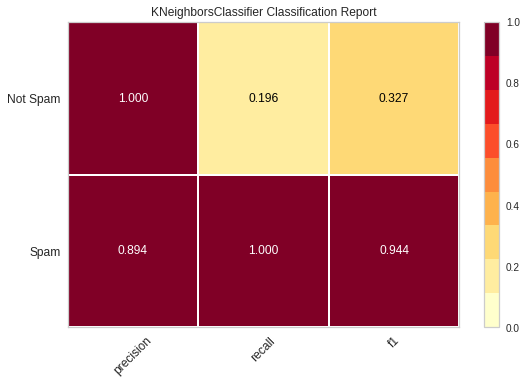

In [ ]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(knn, classes=['Spam','Not Spam'])
visualizer.fit(y_test,y_pre) # Fit the training data to the visualizer
visualizer.score(X_test_count, y_test) # Evaluate the model on the test data
g = visualizer.poof()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1214
           1       1.00      0.20      0.33       179

    accuracy                           0.90      1393
   macro avg       0.95      0.60      0.64      1393
weighted avg       0.91      0.90      0.86      1393



average=macro says the function to compute f1 for each label, and returns the average without considering the proportion for each label in the dataset.
average=weighted says the function to compute f1 for each label, and returns the average considering the proportion for each label in the dataset.